## CIVIL  AVIATION ANALYSIS PROJECT

#### Business Overview

The aviation industry is one of the most crucial sectors in global transportation, connecting businesses, individuals, and economies across vast distances. However, safety remains a critical concern, with aviation accidents posing significant risks to operations, passengers, and reputation. By analyzing data spanning over six decades (1962–2023), this project aims to provide actionable insights that can support organizations in mitigating risks and enhancing decision-making.

This analysis focuses on key factors such as accident trends over time, geographical accident hotspots, the impact of weather conditions, aircraft types, and flight phases associated with varying severity levels. These insights are intended to empower stakeholders in both commercial and private aviation sectors to make data-driven decisions, improve safety measures, and promote sustainable growth in their operations.

With safety at the core of this study, the findings presented here are designed to guide strategic actions, ensuring long-term resilience and reliability in a dynamic and rapidly evolving aviation landscape.

#### PROJECT SUMMARISATION
The aim of this project is to analyse aircraft accident data from 1962 until 2023 in order to find trends, risk factors, and aviation safety insights.  Our goals with Tableau and Python (pandas, NumPy, Matplotlib) are to:

 - Preprocess and clean aircraft accident data. 
 - Examine patterns in accident occurrence, causes, and severity. 
 - Use interactive dashboards and charts to visualise important findings.
 - Determine the contributing risk variables to aircraft incidents.

 DATASETS TO BE USED
 - 'AviationData_csv' - includes locations, causes, aeroplane information, and accident reports.
 - 'USState_Codes.csv' - State codes are mapped to complete state names for analytical purposes.

### DATA PREPARATION

#### Introduction.

Data Preparation is a critical step in any data-driven analysis as it ensures all the information is accurate and relevant.
For this project the aviation accident dataset from the National Transportation Safety Board (spanning from 1962 to 2023) is being thoroughly processed to lay a strong foundation for meaningful insights and actionable recommendations.
The process is essential to eliminate inconsistencies, handle missing information, and refine the data for visualization, ensuring its readiness for informed decision-making.

#### DATA LOADING

The first step of working with the data set is loading the data into a workable environment for analysis.
The dataset file is read and loaded into a DataFrame structure, enabling easy manipulation and analysis.

Tools to be utilized are:
- pandas library
- numpy
- matplotlib
- seaborn

In [1]:
#importing the neccesary python libraries

import pandas as pd  #for 
import numpy as np   #for numerical computations
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns # for statistical plots

In [2]:
#loading the dataset as dataframes for analysis
av_data = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
state_codes_data = pd.read_csv("USState_Codes.csv", encoding="latin1")  


##### Understanding the dataset scope:
This dataset contains aviation accident records spanning over six decades, from 1962 to 2023; an extensive collection of incident data, providing insights into the safety and risks associated with various aircraft types and operating conditions.
It provides a wealth of information essential for identifying trends and risks in the aviation industry.



In [3]:
av_data.info() #brief overview of the key characteristics of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

 The .info() method as above provides us with great information about the characteristics of the DataFrame, without telling us anything about the data it actually contains

In [4]:

av_data.head() #.head() previews the first few rows of our dataset.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
av_data.shape #.shape determines the dimensions (rows and columns) in our DataFrame

(88889, 31)

 The next step is typically to examine the dataset's summary statistics and gain an understanding of the information contained in each column using the .describe() method.

In [6]:
av_data.describe() # calculates the basic summary statistics for each column for us automatically.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The result of the.describe() method is quite useful, and it gives us relevant information such as:

- a count of the amount of values in each column- so it can discover columns with missing values.
- The average and standard deviation of each column
- The lowest and highest values obtained in each column
- The median (50%) and quartile values (25% & 75%) of each column

##### Overal DataFrame Summary
- There are 31 columns and 88889 rows in the data.
-  There are 26 columns with categorical data (objects) and 5 columns with numerical data (floats).
 - There are missing values in 29 columns.



#### Data Cleaning Process

- Handling Missing Values:

Numerical columns are imputed with the mean or median, ensuring accurate representation.
Categorical columns are handled based on the percentage of missing data:

- Removing Duplicates and Irrelevant Columns:

Duplicate rows are removed to maintain data integrity.
Columns with more than 60% missing values are dropped, as they provide limited utility.

- Standardizing Data Types:
Ensures proper formatting of datetime, numerical, and categorical fields for seamless analysis.

- Final Validation:

Summary statistics and checks (e.g., isnull().sum() and shape) confirm that the dataset is clean and ready for further analysis.

- HANDLING MISSING VALUES

In [7]:
#identifying missing values 
av_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

- The above output the columns names are not standardized. to make them standardized we can change the '.' to '_' which will make the data much easier to be read and understood.


In [8]:
#display current columns
av_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#Standardizing column names
av_data.columns = av_data.columns.str.replace('.', '_').str.title()

#Display updated columns
av_data.columns


Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

Now the column names are standardized we can contiunue with handling the missing values 

In [10]:
#printing out the misssing values in percentage for easy understanding

missing_values = av_data.isnull().sum()

# Displaying only columns with missing values
missing_values = missing_values[missing_values > 0]

# Checking percentage of missing values
missing_percentage = (missing_values / len(av_data)) * 100

# Display missing values with percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
Location,52,0.058500
Country,226,0.254250
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport_Code,38757,43.601570
Airport_Name,36185,40.708074
Injury_Severity,1000,1.124999
Aircraft_Damage,3194,3.593246
Aircraft_Category,56602,63.677170
Registration_Number,1382,1.554748


- FILLING MISSING  VALUES

1. For values with 5% and below, filling will be done with *mode*
2. for values between 5% and 20% ,replacing will be done  with *unknown*
3. for values above 20%, *forward fill (ffill)* and *backward fill (bfill)*

In [11]:
# Get the total number of rows in the dataset
total_rows = len(av_data)

# Loop through columns with missing values in categorical data
for col in missing_values.index:
    missing_percentage = (missing_values[col] / total_rows) * 100     # Calculate the percentage of missing values for the column
    
    # Handle missing values based on their percentage
    
    if missing_percentage <= 5:  # For 5% or less missing values
       av_data[col] = av_data[col].fillna(av_data[col].mode()[0])  # Fill with the most frequent value (mode)
        
    elif 5 < missing_percentage <= 20:  # For missing values between 5% and 20%
        av_data[col] = av_data[col].fillna("Unknown") # Fill with a placeholder "Unknown"
        
    else:  
        av_data[col] = av_data[col].fillna(method='ffill') # For more than 20% missing values, First attempt forward fill
        av_data[col] = av_data[col].fillna(method='bfill')  # Then backfill remaining missing values

# Verify missing values after handling
print("Remaining missing values after cleaning:")
av_data.isnull().sum()


C:\Users\HomePC\AppData\Local\Temp\ipykernel_14028\3058055022.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  av_data[col] = av_data[col].fillna(method='ffill') # For more than 20% missing values, First attempt forward fill
C:\Users\HomePC\AppData\Local\Temp\ipykernel_14028\3058055022.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  av_data[col] = av_data[col].fillna(method='bfill')  # Then backfill remaining missing values


Remaining missing values after cleaning:


Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport_Code              0
Airport_Name              0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Registration_Number       0
Make                      0
Model                     0
Amateur_Built             0
Number_Of_Engines         0
Engine_Type               0
Far_Description           0
Schedule                  0
Purpose_Of_Flight         0
Air_Carrier               0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_Phase_Of_Flight     0
Report_Status             0
Publication_Date          0
dtype: int64

##### Fillling numerical and categorical columns

In [12]:
# Ensure columns are numeric by coercing errors (non-numeric values will be converted to NaN)
numeric_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 
                   'Total_Uninjured', 'Number_Of_Engines']
for col in numeric_columns:
    av_data[col] = pd.to_numeric(av_data[col], errors='coerce')  # Converts non-numeric values to NaN

# Fill missing values for each column
av_data['Total_Fatal_Injuries'] = av_data['Total_Fatal_Injuries'].fillna(np.ceil(av_data['Total_Fatal_Injuries'].mean()))
av_data['Total_Serious_Injuries'] = av_data['Total_Serious_Injuries'].fillna(np.ceil(av_data['Total_Serious_Injuries'].mean()))
av_data['Total_Minor_Injuries'] = av_data['Total_Minor_Injuries'].fillna(np.ceil(av_data['Total_Minor_Injuries'].mean()))
av_data['Total_Uninjured'] = av_data['Total_Uninjured'].fillna(round(av_data['Total_Uninjured'].mean()))
av_data['Number_Of_Engines'] = av_data['Number_Of_Engines'].fillna(av_data['Number_Of_Engines'].median())

# Confirm the changes
print("Missing values after filling:")
print(av_data.isnull().sum())


Missing values after filling:
Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport_Code              0
Airport_Name              0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Registration_Number       0
Make                      0
Model                     0
Amateur_Built             0
Number_Of_Engines         0
Engine_Type               0
Far_Description           0
Schedule                  0
Purpose_Of_Flight         0
Air_Carrier               0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_Phase_Of_Flight     0
Report_Status             0
Publication_Date          0
dtype: int64


##### Formatting the datetime
- to help analyze when accidents occur the most.
- will help in comparing accidents that happen during *Winter* and other seasons.

In [13]:
# Convert the 'Event_Date' column to datetime format
av_data['Event_Date'] = pd.to_datetime(av_data['Event_Date'], errors='coerce')

# Extract year, month, and day of the week
av_data['Year'] = av_data['Event_Date'].dt.year
av_data['Month'] = av_data['Event_Date'].dt.month
av_data['Day_Of_Week'] = av_data['Event_Date'].dt.day_name()

# Check the resulting DataFrame
print(av_data[['Event_Date', 'Year', 'Month', 'Day_Of_Week']].head())

  Event_Date  Year  Month Day_Of_Week
0 1948-10-24  1948     10      Sunday
1 1962-07-19  1962      7    Thursday
2 1974-08-30  1974      8      Friday
3 1977-06-19  1977      6      Sunday
4 1979-08-02  1979      8    Thursday


 - Dropping columns with alot of missing values and missing fields

In [14]:
# Drop columns with more than 60% missing values based on a threshold
column_threshold = len(av_data) * 0.4
av_data = av_data.loc[:, av_data.notnull().sum() > column_threshold]

# Drop rows where essential fields are missing
critical_columns = ['Make', 'Model', 'Amateur_Built']
av_data = av_data.dropna(subset=critical_columns)


- Dropping Irrelevant colums

The irrelevant columns include:
1. Airport_code
2.  Accident_number 
3. location
4. Registration_number
5. Country
6. Report_Status & Publication_Date 

the above will not be usefull in visualisation

In [15]:
#dropping irrelevant columns
drop_columns = ['Accident_Number', 'Registration_Number', 'Airport_Code', 'Report_Status', 'Publication_Date','Country', 'Location']
av_data = av_data.drop(columns=drop_columns)

av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88889 non-null  object        
 1   Investigation_Type      88889 non-null  object        
 2   Event_Date              88889 non-null  datetime64[ns]
 3   Latitude                88889 non-null  object        
 4   Longitude               88889 non-null  object        
 5   Airport_Name            88889 non-null  object        
 6   Injury_Severity         88889 non-null  object        
 7   Aircraft_Damage         88889 non-null  object        
 8   Aircraft_Category       88889 non-null  object        
 9   Make                    88889 non-null  object        
 10  Model                   88889 non-null  object        
 11  Amateur_Built           88889 non-null  object        
 12  Number_Of_Engines       88889 non-null  float6

##### Incidents Count

we are creating new columns that will do a count of the number of incidents based on different categories.
By calculating the number of instances in different categories, we can:

- Identify high-risk aircraft manufacturers and models.
- Determine which types of flights have more accidents.
- Examine the meteorological conditions connected with aviation incidents.
- Enhance accident prediction models by including relevant features.

1. groupby('Make') will group the dataset by Make.

 Counts the number of times each manufacturer appears in the dataset (that is, how many accidents involve aircraft from that manufacturer).
 Each row's count is assigned to a new column called manufacturer_incident_count.

2. groupby('Model') will group the dataset by Model:

 Determines how many accidents occurred for each model.
 The count is stored in model_incident_count.
 
3. group(by) Purpose_Of_Flight.

 Determines how many accidents occurred for each type of flight.
 To hold the count we create flight_purpose_incident_count.

4. groupby('Weather_Condition') organises accidents based on weather condition:

 Counts how many accidents occurred in each weather condition.
 This is saved in weather_incident_count to help analyse how weather affects aviation safety.




In [16]:
av_data['Manufacturer_Incident_Count'] = av_data.groupby('Make')['Make'].transform('count') # Count incidents per aircraft manufacturer (Make)
av_data['Model_Incident_Count'] = av_data.groupby('Model')['Model'].transform('count') # Count incidents per aircraft model
av_data['Flight_Purpose_Incident_Count'] = av_data.groupby('Purpose_Of_Flight')['Purpose_Of_Flight'].transform('count') # Count incidents per flight purpose
av_data['Weather_Condition_Count'] = av_data.groupby('Weather_Condition')['Weather_Condition'].transform('count') # Count incidents per weather condition

In [17]:
#renaming the clean data set

cleaned_av_data = av_data
cleaned_av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Event_Id                       88889 non-null  object        
 1   Investigation_Type             88889 non-null  object        
 2   Event_Date                     88889 non-null  datetime64[ns]
 3   Latitude                       88889 non-null  object        
 4   Longitude                      88889 non-null  object        
 5   Airport_Name                   88889 non-null  object        
 6   Injury_Severity                88889 non-null  object        
 7   Aircraft_Damage                88889 non-null  object        
 8   Aircraft_Category              88889 non-null  object        
 9   Make                           88889 non-null  object        
 10  Model                          88889 non-null  object        
 11  Amateur_Built  

In [18]:
 #Save the updated DataFrame to a CSV file
av_data.to_csv('cleaned_av_data.csv', index=False)

### Data Visualisation


visualisation is Creating attractive insights from raw data.
 The visualisations in this area are intended to help identify trends, patterns, and abnormalities in the dataset of aircraft accidents. 
  Plots have been carefully chosen to address important issues and offer useful information to operational managers, legislators, and aviation safety specialists.

Using clear and impactful visuals, we aim to highlight:
- trends over time in aviation accidents.
- Important risk factors include geographic patterns, weather, and aircraft types.

- the seriousness of collisions and their results (deaths, injuries, and passengers who were not hurt).

- insights to inform suggestions for enhancing aviation safety procedures.




##### For the visualizations you're planning, the following key features of the dataset will be used:

1. Derived Features:

Day_Of_Week: Extracted from the Event_Date to analyze patterns in weekdays.

Year and Month: Extracted from Event_Date to explore annual and monthly trends.

2. Numerical Features:

Number_Of_Engines: To analyze the accident proportions based on engine types.

3. Categorical Features:

Aircraft_Type: To identify the most common aircraft models involved in accidents.

Weather: To study the impact of different weather conditions on accidents.

Location: For geographical analysis, identifying high-risk regions.

4. Temporal Features:

Year, Month, and Day_Of_Week: These help in exploring trends over time, seasonal patterns, and weekday variations in aviation accidents.


##### DATA VISUALISATIONS 



##### 1. Number of Accidents over time

a line plot showing the yearly count of  accidents to reveal safety trends over time

Insights:
- Safety Trends:

A decreasing trend in accidents over time might indicate improvements in aviation safety, technology, regulations, or pilot training.
Any spikes in specific years could point to major incidents, global crises (e.g., wars, economic downturns), or lapses in safety protocols during those periods.

- Era-Specific Observations:

Early years may show a higher frequency of accidents due to less advanced technology and infrastructure.
Recent decades might reflect stability, with fewer accidents due to innovations and stricter regulations.

- Patterns of Interest:

Periods of sudden rises or declines in accidents could highlight changes in industry practices or external factors like weather anomalies or geopolitical events.

- Call to Action:

Stakeholders can focus on identifying factors behind safety improvements and ensuring they are sustained.
Examine periods with high accident counts to understand and prevent similar trends.

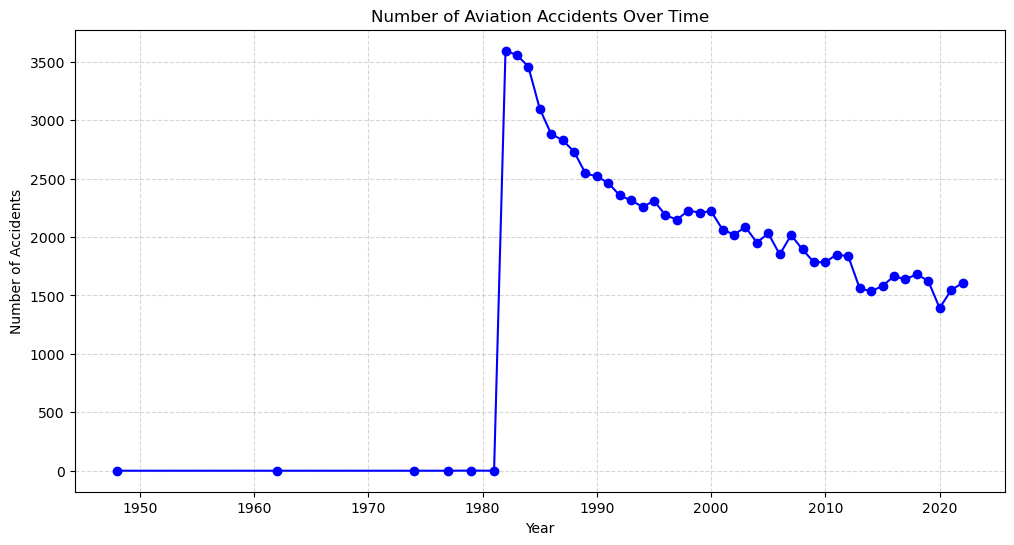

In [19]:
yearly_accidents = cleaned_av_data.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='blue')

# Add labels, title, and grid
plt.title('Number of Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)

##### 2. Manufacturer_Incident_Count vs Number of Engines

Planes with different engine configurations are designed by different aircraft manufacturers.  Manufacturers and engine counts are shown in a box plot to reveal information about their aircraft designs.

Insights:

- Variability in Incidents: Shows how incidents vary among manufacturers for each engine type. Wider boxes indicate greater variability.
- Manufacturer-Specific Patterns: Reveals manufacturers with consistently high or low incident counts across engine types, aiding in pinpointing areas for improvement.
- Outliers: Identifies manufacturers with unusually high or low incident counts for certain engine types, which may signal safety concerns or exceptional performance.



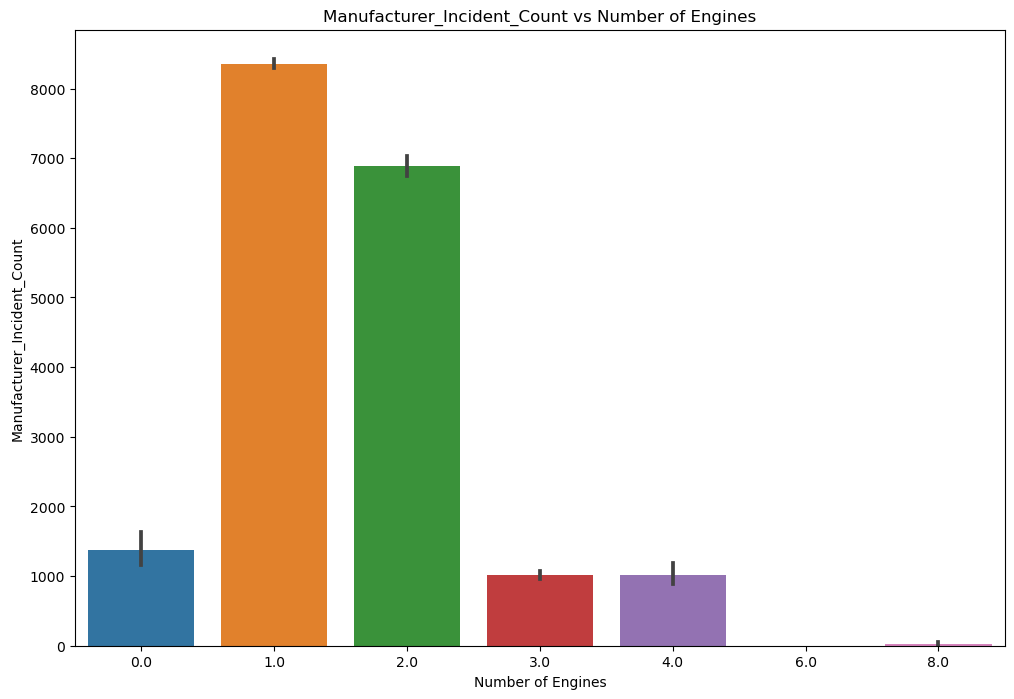

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x=av_data['Number_Of_Engines'], y=av_data['Manufacturer_Incident_Count'])
plt.xticks(rotation=90)
plt.title('Manufacturer_Incident_Count vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Manufacturer_Incident_Count')
plt.xticks(rotation=0)

plt.show()

##### 3. Most Common aircraft type

A horizontal bar plot showcasing the top aircraft models involved in accidents.

insight:
- Most Frequent Aircraft Types:
The plot highlights the top 10 aircraft models involved in accidents. Specific types with higher counts might indicate factors like high usage rates or potential design or operational challenges.

- Usage Versus Risk:
Aircraft types with high counts may not necessarily be unsafe but could reflect their widespread use in aviation (e.g., popular commercial or cargo models).

- Manufacturer Trends:
By examining the manufacturers of these top aircraft types, stakeholders can investigate trends and determine if certain manufacturers or models need more focus on safety.

- Operational Insights:
If certain aircraft types are predominantly used in specific roles (e.g., commercial, military, or private aviation), their accident frequency might reflect unique risks associated with those operations.

- Actionable Recommendations:
Focus on aircraft types with abnormally high accident counts relative to their usage rate. This could guide further investigation into maintenance, design, or operational practices.

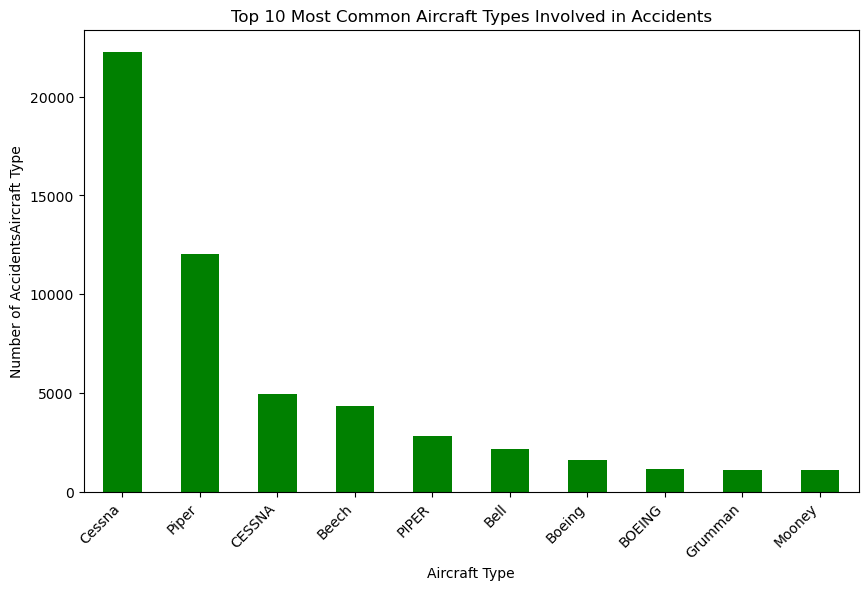

In [21]:

plt.figure(figsize=(10, 6))
cleaned_av_data['Make'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Common Aircraft Types Involved in Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of AccidentsAircraft Type')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 4. Aircraft damage type 
The extent of aircraft damage varies depending on the accident.  This graphic divides incidences into three categories: total loss, significant damage, and minor damage.

insights:
- Distribution of Damage Types:
The plot reveals the frequency of each damage type. For example:
Minor Damage: Indicates less severe incidents, which may correlate with better safety protocols.
Substantial Damage: Could point to accidents requiring investigation and repairs.

- Total Loss:
 Highlights catastrophic incidents where the aircraft cannot be salvaged, likely tied to severe accidents.

-  Focus Areas for Prevention:
If "Substantial Damage" or "Total Loss" dominate, safety measures should be reassessed to reduce these incidents.

- Industry Trends:
Comparing trends in damage over time or across manufacturers could provide insights into evolving aircraft safety.

- Actionable Recommendations:
Encourage research into scenarios that lead to "Total Loss" and develop safeguards.
Investigate contributing factors for "Substantial Damage" incidents to mitigate repair costs.



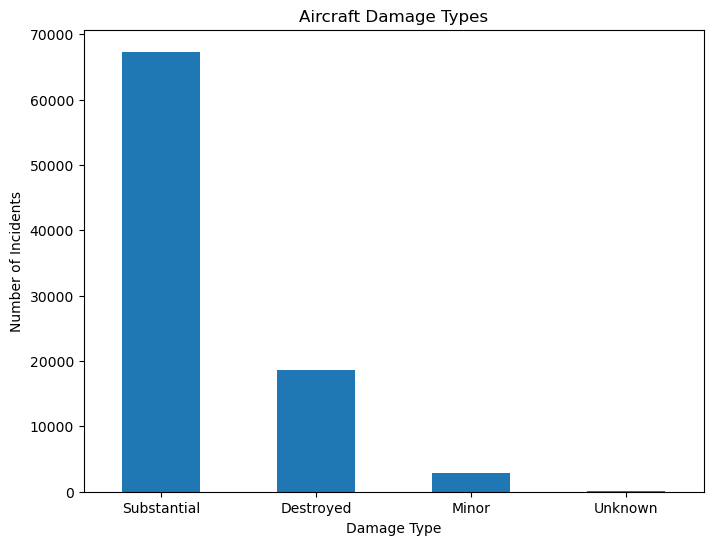

In [22]:

damage_counts = cleaned_av_data['Aircraft_Damage'].value_counts()

plt.figure(figsize=(8, 6))
damage_counts.plot(kind='bar')

plt.title('Aircraft Damage Types')
plt.xlabel('Damage Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

##### 5.Weather Impact in the Aviation Accidents
A scatter plot explores how various weather conditions are associated with the number of fatalities in aviation accidents.
 It provides a visual representation of which weather conditions pose the highest risks.

insights:
- High-Risk Weather:
Weather conditions with the highest fatalities can be identified (e.g., storms or foggy conditions may dominate).

- Safe Weather Conditions:
Conditions with minimal fatalities (e.g., clear skies) highlight when aviation safety is generally higher.

- Operational Impacts:
Patterns may reveal the need for more stringent safety measures or training for pilots under certain weather conditions.

- Data Gaps:
Any missing or sparse data can indicate areas requiring further investigation or data collection.

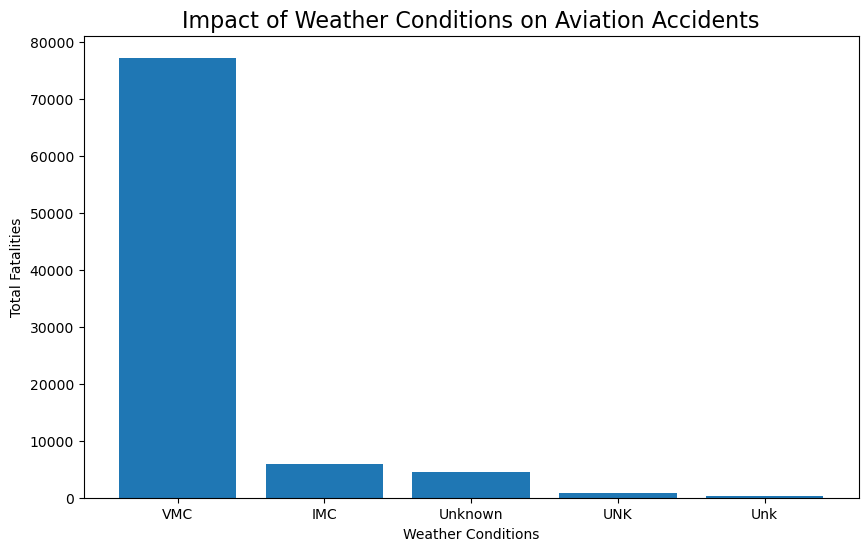

In [23]:
weather_counts = cleaned_av_data['Weather_Condition'].value_counts()
categories = weather_counts.index

plt.figure(figsize=(10, 6))
plt.bar(categories,weather_counts)

plt.title('Impact of Weather Conditions on Aviation Accidents', fontsize=16)
plt.xlabel('Weather Conditions')
plt.ylabel('Total Fatalities')
plt.show()

##### 6. Phase of flight accidents
Not every stage of flight is equally dangerous.  We can identify crucial moments that call for further vigilance by examining whatever phase—takeoff, climb, cruise, descent, or landing—has the greatest accident rates.

Insights:
- what are the high risk phases 
- analysis can be done on why some phases are riskier
- what protocols for high-risk phases, ensuring safety during takeoff, landing, and other challenging stages can be enhanced.




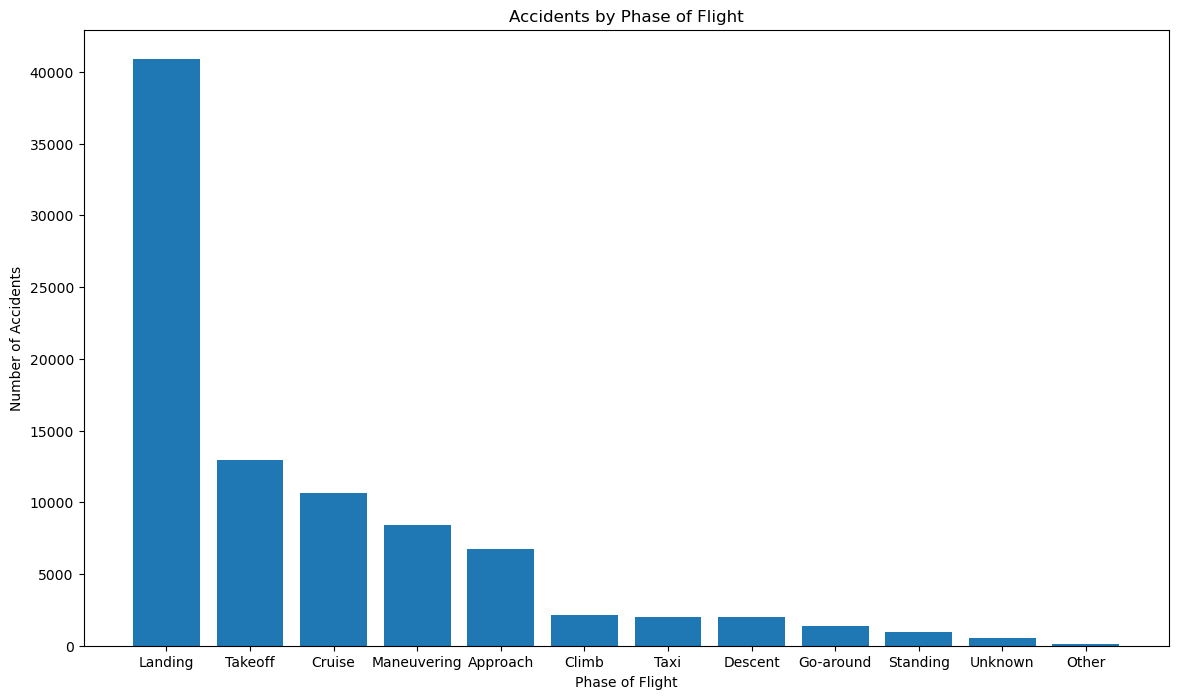

In [24]:
flight_phase_counts = cleaned_av_data['Broad_Phase_Of_Flight'].value_counts()
categories = flight_phase_counts.index


plt.figure(figsize=(14, 8))
plt.bar(categories, flight_phase_counts)

plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.show()

##### 7. Accidents by number of engines
The question of whether more engines lead to fewer or more accidents is investigated in this investigation.  Aircraft with one, two, or more engines are compared.

insights:
- which engine aircraft and have higher accident rates due to mechanical failure risks?
- evaluate which engines have more failure point
- analyze how engine count influence accidents survival rate


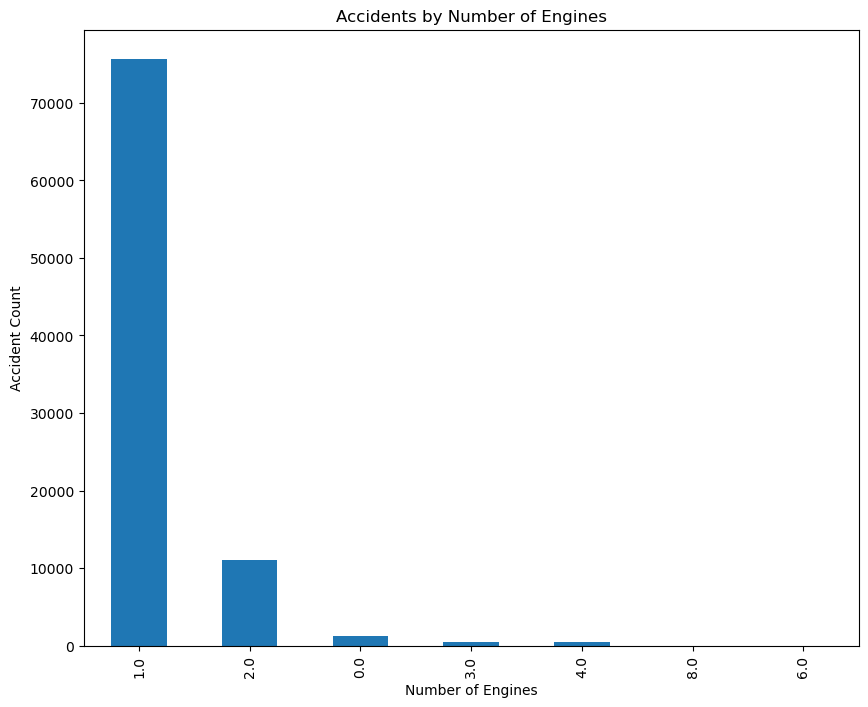

In [25]:
plt.figure(figsize=(10, 8))
cleaned_av_data['Number_Of_Engines'].value_counts().plot(kind='bar')

plt.title('Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.show()

##### 8. Types of injuries on different flight phases

A stacked bar plot visualizes how different types of injuries (fatal, serious, and minor) vary across the phases of flight (e.g., taxi, takeoff, cruise, landing). 

Insights:
- what the the high risk phases
- severity by phase
- Training focus and operational improvements

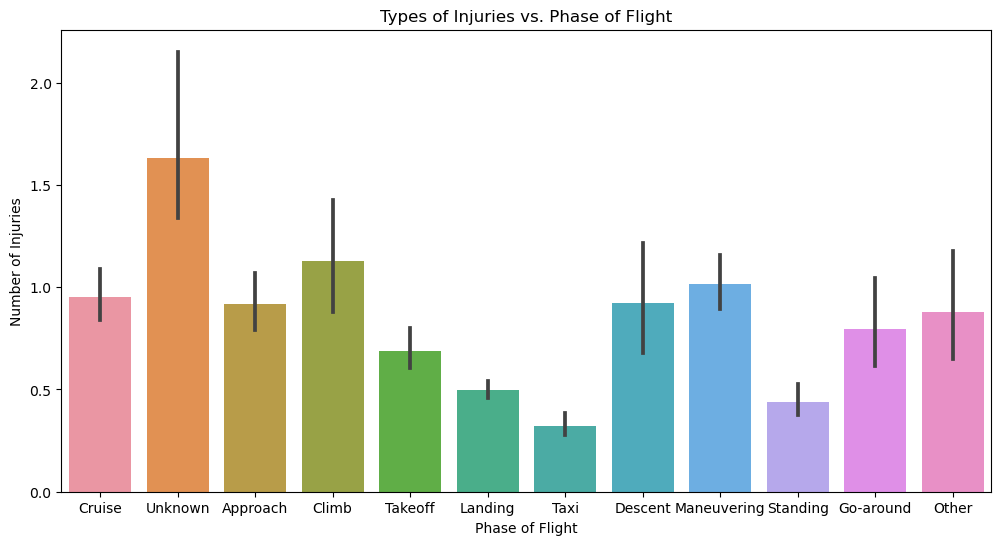

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cleaned_av_data['Broad_Phase_Of_Flight'], y=cleaned_av_data['Total_Fatal_Injuries'])

plt.title('Types of Injuries vs. Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Injuries')
plt.show()

##### 9. Manufacturer vs Number of engines
we use a bar plot to provide a visual presentation of the relationship between aircraft manufacturers and the number of engines in their aircraft involved in accidents.

Insights:
- analyse whuch manufactures have higher accidents and do the neccesary safety measures.
- Some manufacturers may show higher accident counts for certain engine types, indicating their specialization or focus (e.g., manufacturers of single-engine private planes vs. twin-engine commercial jets).
- reveal which engine types are most commonly associated with accidents for each manufacturer.


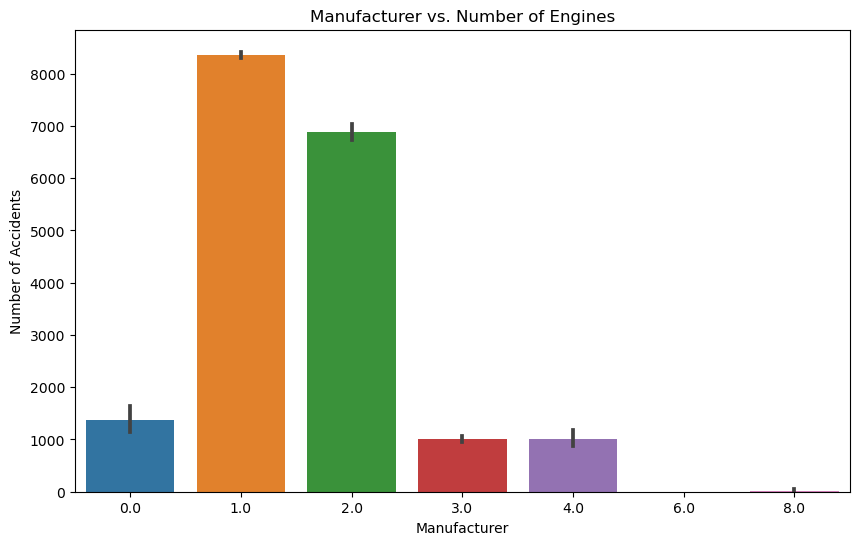

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_av_data['Number_Of_Engines'], y=cleaned_av_data['Manufacturer_Incident_Count'])

plt.title('Manufacturer vs. Number of Engines')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.show()